## Coronary Heart Disease Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Sklearn
from sklearn.preprocessing import normalize 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler


from sklearn.calibration import CalibratedClassifierCV

# Evaluation Metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.svm import SVR


In [2]:
df=pd.read_csv('framingham.csv')


In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
columns = df.columns
columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
df.dtypes


male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6ac4b8320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa67efbcf28>]], dtype=object)

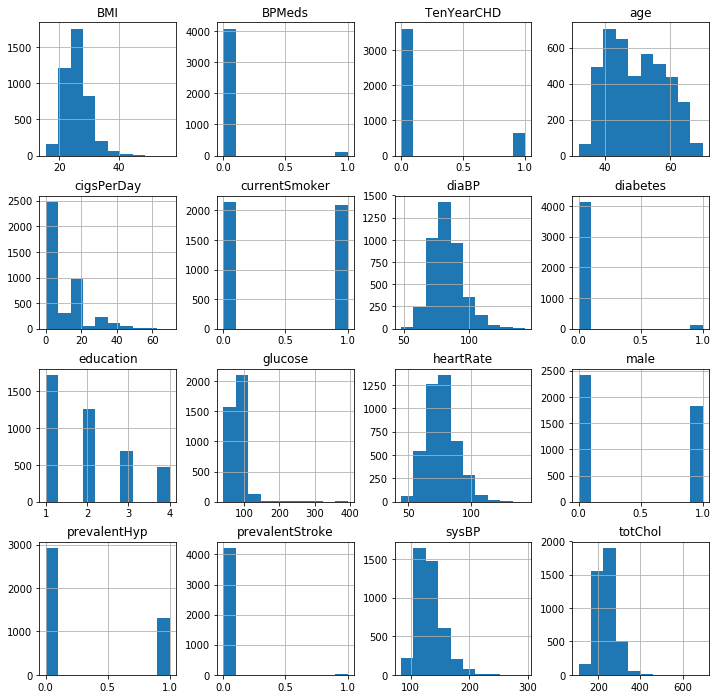

In [6]:
df.hist(figsize=(12,12))


In [7]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Filling Null Values (NaN - Not a Number) with Attribute Mean

In [8]:
for i in columns:
    df[i] = df[i].fillna(df[i].mean())

In [9]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.007082,0.500024,11.881610,0.168481,0.076569,0.462799,0.158280,44.327521,22.033300,11.910394,4.070687,12.023929,22.831748,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Analysing Class Distribution

#### TenYearCHD attribute gives whether an individual is at risk of suffering from CHD in next 10 years
0 - Not at Risk

1 - At Risk

Class 0: 3596
Class 1: 644
Proportion: 5.58 : 1


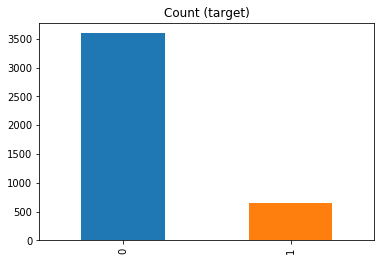

In [10]:
target_count = df['TenYearCHD'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [11]:
# Class count
count_class_0, count_class_1 = df['TenYearCHD'].value_counts()

# Divide by class
df_class_0 = df[df['TenYearCHD'] == 0]
df_class_1 = df[df['TenYearCHD'] == 1]

In [12]:
df_class_0

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.000000,0,0.0,0.000000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2.000000,0,0.0,0.000000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1.000000,1,20.0,0.000000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
4,0,46,3.000000,1,23.0,0.000000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
5,0,43,2.000000,0,0.0,0.000000,0,1,0,228.0,180.0,110.0,30.30,77.0,99.000000,0
7,0,45,2.000000,1,20.0,0.000000,0,0,0,313.0,100.0,71.0,21.68,79.0,78.000000,0
8,1,52,1.000000,0,0.0,0.000000,0,1,0,260.0,141.5,89.0,26.36,76.0,79.000000,0
9,1,43,1.000000,1,30.0,0.000000,0,1,0,225.0,162.0,107.0,23.61,93.0,88.000000,0
10,0,50,1.000000,0,0.0,0.000000,0,0,0,254.0,133.0,76.0,22.91,75.0,76.000000,0
11,0,43,2.000000,0,0.0,0.000000,0,0,0,247.0,131.0,88.0,27.64,72.0,61.000000,0


In [13]:
df_class_1

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3,0,61,3.000000,1,30.000000,0.0,0,1,0,225.000000,150.0,95.0,28.580000,65.0,103.000000,1
6,0,63,1.000000,0,0.000000,0.0,0,0,0,205.000000,138.0,71.0,33.110000,60.0,85.000000,1
15,0,38,2.000000,1,20.000000,0.0,0,1,0,221.000000,140.0,90.0,21.350000,95.0,70.000000,1
17,0,46,2.000000,1,20.000000,0.0,0,0,0,291.000000,112.0,78.0,23.380000,80.0,89.000000,1
25,1,47,4.000000,1,20.000000,0.0,0,0,0,294.000000,102.0,68.0,24.180000,62.0,66.000000,1
28,0,61,3.000000,0,0.000000,0.0,0,1,0,272.000000,182.0,121.0,32.800000,85.0,65.000000,1
32,0,59,1.000000,0,0.000000,0.0,0,1,0,209.000000,150.0,85.0,20.770000,90.0,88.000000,1
33,1,61,1.979444,1,5.000000,0.0,0,0,0,175.000000,134.0,82.5,18.590000,72.0,75.000000,1
42,0,52,1.000000,0,0.000000,1.0,0,1,0,236.699523,148.0,92.0,25.090000,70.0,81.963655,1
44,0,53,3.000000,0,0.000000,1.0,0,1,1,311.000000,206.0,92.0,21.510000,76.0,215.000000,1


### Normaizing Class Distribution

Random over-sampling:
1    3596
0    3596
Name: TenYearCHD, dtype: int64


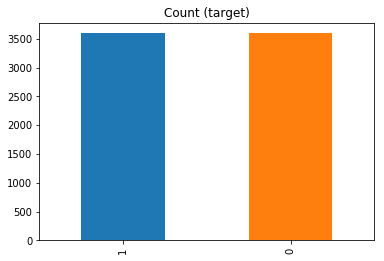

In [14]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over['TenYearCHD'].value_counts())

df_test_over['TenYearCHD'].value_counts().plot(kind='bar', title='Count (target)');


In [15]:
df = df_test_over
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0


In [16]:
df.shape

(7192, 16)

### Z-score Normalization on selected numerical attributes

In [17]:
from scipy.stats import zscore
df['cigsPerDay'] = df[['cigsPerDay']].apply(zscore)
df['totChol'] = df[['totChol']].apply(zscore)
df['sysBP'] = df[['sysBP']].apply(zscore)
df['diaBP'] = df[['diaBP']].apply(zscore)
df['BMI'] = df[['BMI']].apply(zscore)
df['heartRate'] = df[['heartRate']].apply(zscore)
df['glucose'] = df[['glucose']].apply(zscore)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.000000,0,-0.781864,0.0,0,0,0,-0.985166,-1.254926,-1.142291,0.190049,0.312938,-0.249974,0
1,0,46,2.000000,0,-0.781864,0.0,0,0,0,0.204433,-0.649596,-0.285450,0.599886,1.551000,-0.281594,0
2,1,48,1.000000,1,0.826448,0.0,0,0,0,0.096288,-0.387286,-0.363344,-0.189516,-0.099749,-0.471311,0
4,0,46,3.000000,1,1.067695,0.0,0,0,0,0.961451,-0.286398,-0.051766,-0.711127,0.725625,0.002983,0
5,0,43,2.000000,0,-0.781864,0.0,0,1,0,-0.271407,1.731368,1.973496,0.965480,0.065326,0.445659,0
7,0,45,2.000000,1,0.826448,0.0,0,0,0,1.567065,-1.497058,-1.064396,-1.041791,0.230401,-0.218354,0
8,1,52,1.000000,0,-0.781864,0.0,0,1,0,0.420724,0.177688,0.337708,0.048003,-0.017212,-0.186735,0
9,1,43,1.000000,1,1.630604,0.0,0,1,0,-0.336294,1.004972,1.739812,-0.592367,1.385925,0.097842,0
10,0,50,1.000000,0,-0.781864,0.0,0,0,0,0.290949,-0.165332,-0.674923,-0.755371,-0.099749,-0.281594,0
11,0,43,2.000000,0,-0.781864,0.0,0,0,0,0.139546,-0.246043,0.259813,0.346067,-0.347361,-0.755888,0


In [18]:
X = df.drop(['TenYearCHD','education'],axis = 1)
Y = df['TenYearCHD']

In [19]:
X.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,-0.781864,0.0,0,0,0,-0.985166,-1.254926,-1.142291,0.190049,0.312938,-0.249974
1,0,46,0,-0.781864,0.0,0,0,0,0.204433,-0.649596,-0.285450,0.599886,1.551000,-0.281594
2,1,48,1,0.826448,0.0,0,0,0,0.096288,-0.387286,-0.363344,-0.189516,-0.099749,-0.471311
4,0,46,1,1.067695,0.0,0,0,0,0.961451,-0.286398,-0.051766,-0.711127,0.725625,0.002983
5,0,43,0,-0.781864,0.0,0,1,0,-0.271407,1.731368,1.973496,0.965480,0.065326,0.445659


In [20]:
Y.head()

0    0
1    0
2    0
4    0
5    0
Name: TenYearCHD, dtype: int64

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)


In [22]:
print(X_train.shape)
print(X_test.shape)
#Y_train = np.asarray(Y_train).reshape(-1,1)
#Y_test = np.asarray(Y_test).reshape(-1,1)
print(Y_train.shape)
print(Y_test.shape)

(5394, 14)
(1798, 14)
(5394,)
(1798,)


## KNN

In [23]:
import time
start = time.time()

knn =  KNeighborsClassifier(n_neighbors=2).fit(X_train,Y_train)
y_pred=knn.predict(X_test)

end = time.time()

print("Accuracy:",accuracy_score(Y_test, y_pred))

print(end-start)

cm = confusion_matrix(Y_test,y_pred)
print(cm)

TP =cm[0][0]
FN =cm[0][1]
TN = cm[1][1]
FP = cm[1][0]

print("TP: ", TP)
print("TN", TN)
print("FP", FP)
print("FN", FN)

Precision = (TP / (TP+FP))
Recall = (TP / (TP+FN))

print("Accuracy: ", ((TP+TN) / (TP+FP+FN+TN)))
print("Precision", (TP / (TP+FP)))
print("Recall", (TP / (TP+FN)))
print("Specificity", (TN / (TN+FP)) )
print("F1 Score",  ((2 * Precision * Recall) / (Precision + Recall)))

print(classification_report(Y_test, y_pred))




Accuracy: 0.893770856507
0.0760955810546875
[[756 137]
 [ 54 851]]
TP:  756
TN 851
FP 54
FN 137
Accuracy:  0.893770856507
Precision 0.933333333333
Recall 0.846584546473
Specificity 0.940331491713
F1 Score 0.887844979448
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       893
           1       0.86      0.94      0.90       905

   micro avg       0.89      0.89      0.89      1798
   macro avg       0.90      0.89      0.89      1798
weighted avg       0.90      0.89      0.89      1798



In [24]:
df.groupby('TenYearCHD').count()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,3596,3596,3596,3596,3596,3596,3596,3596,3596,3596,3596,3596,3596,3596,3596
1,3596,3596,3596,3596,3596,3596,3596,3596,3596,3596,3596,3596,3596,3596,3596


Text(0,0.5,'Mean Error')

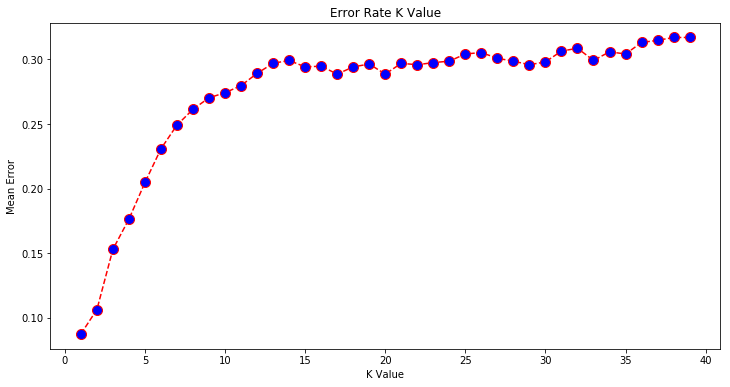

In [25]:
error = []
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [26]:
from sklearn.model_selection import cross_val_score
knn =  KNeighborsClassifier(n_neighbors=2).fit(X_train,Y_train)
cv_scores = cross_val_score(knn, X, Y, cv=10)

print(cv_scores)
print("\nCross Validation Scores mean:{}".format(np.mean(cv_scores)))

[ 0.9125      0.89861111  0.91805556  0.92777778  0.92777778  0.91111111
  0.92618384  0.91922006  0.92200557  0.90668524]

Cross Validation Scores mean:0.9169928040854224


## Logistic Regression

In [27]:
lr =  LogisticRegression(solver='saga',max_iter=10).fit(X_train,Y_train)
y_pred=lr.predict(X_test)
print("Accuracy:",accuracy_score(Y_test, y_pred))

Accuracy: 0.643492769744


/home/divya/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## Decision Tree

In [28]:
start = time.time()


dt = tree.DecisionTreeClassifier().fit(X_train,Y_train)
y_pred=dt.predict(X_test)
end = time.time()

print("Accuracy:",accuracy_score(Y_test, y_pred))
print(end-start)



cm = confusion_matrix(Y_test,y_pred)
print(cm)

TP =cm[0][0]
FN =cm[0][1]
TN = cm[1][1]
FP = cm[1][0]

print("TP: ", TP)
print("TN", TN)
print("FP", FP)
print("FN", FN)

Precision = (TP / (TP+FP))
Recall = (TP / (TP+FN))

print("Accuracy: ", ((TP+TN) / (TP+FP+FN+TN)))
print("Precision", (TP / (TP+FP)))
print("Recall", (TP / (TP+FN)))
print("Specificity", (TN / (TN+FP)) )
print("F1 Score",  ((2 * Precision * Recall) / (Precision + Recall)))

print(classification_report(Y_test, y_pred))


Accuracy: 0.905450500556
0.03830528259277344
[[738 155]
 [ 15 890]]
TP:  738
TN 890
FP 15
FN 155
Accuracy:  0.905450500556
Precision 0.980079681275
Recall 0.826427771557
Specificity 0.983425414365
F1 Score 0.896719319563
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       893
           1       0.85      0.98      0.91       905

   micro avg       0.91      0.91      0.91      1798
   macro avg       0.92      0.90      0.90      1798
weighted avg       0.92      0.91      0.90      1798



## Gaussian Naive Bayes

In [29]:
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
y_pred=gnb.predict(X_test)
print("Accuracy:",accuracy_score(Y_test, y_pred))

Accuracy: 0.58787541713


## Random Forest

In [30]:
start = time.time()

rf=RandomForestClassifier(n_estimators=10)
rf.fit(X_train,Y_train)
y_pred=rf.predict(X_test)

end = time.time()

print("Accuracy:",accuracy_score(Y_test, y_pred))

print(end-start)

cm = confusion_matrix(Y_test,y_pred)
print(cm)

TP =cm[0][0]
FN =cm[0][1]
TN = cm[1][1]
FP = cm[1][0]

print("TP: ", TP)
print("TN", TN)
print("FP", FP)
print("FN", FN)

Precision = (TP / (TP+FP))
Recall = (TP / (TP+FN))

print("Accuracy: ", ((TP+TN) / (TP+FP+FN+TN)))
print("Precision", (TP / (TP+FP)))
print("Recall", (TP / (TP+FN)))
print("Specificity", (TN / (TN+FP)) )
print("F1 Score",  ((2 * Precision * Recall) / (Precision + Recall)))

print(classification_report(Y_test, y_pred))




Accuracy: 0.954949944383
0.07215762138366699
[[826  67]
 [ 14 891]]
TP:  826
TN 891
FP 14
FN 67
Accuracy:  0.954949944383
Precision 0.983333333333
Recall 0.924972004479
Specificity 0.98453038674
F1 Score 0.953260242354
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       893
           1       0.93      0.98      0.96       905

   micro avg       0.95      0.95      0.95      1798
   macro avg       0.96      0.95      0.95      1798
weighted avg       0.96      0.95      0.95      1798



In [31]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, Y, cv=10)

print(cv_scores)
print("\nCross Validation Scores mean:{}".format(np.mean(cv_scores)))

[ 0.9625      0.96388889  0.96805556  0.97916667  0.98472222  0.96666667
  0.97214485  0.97771588  0.9735376   0.96239554]

Cross Validation Scores mean:0.9710793871866296


## ROC(Receiver Operating Characteristics) Curve

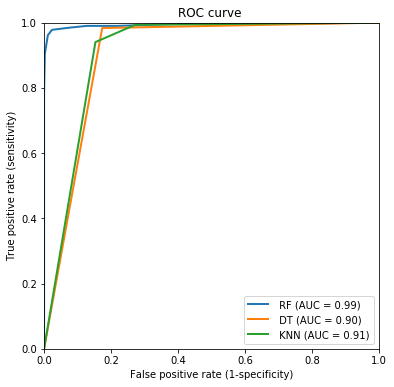

In [32]:
import sklearn.metrics as metrics
y_pred_knn =knn.predict_proba(X_test)[:,1]
y_pred_rf =rf.predict_proba(X_test)[:,1]
y_pred_dt = dt.predict_proba(X_test)[:,1]
#_pred_lr=lr.predict_proba(X_test)[:,1]

models=[y_pred_rf,y_pred_dt,y_pred_knn]
label=['RF','DT','KNN']
fig1 = plt.figure(figsize=[6,6])

for i in range(3):
    fpr, tpr,thresholds= metrics.roc_curve(Y_test,models[i])
    #rint('model:',label[i])
    #rint('thresholds:',np.round(thresholds,3))
    #rint('tpr:       ',np.round(tpr,3))
    #rint('fpr:       ',np.round(fpr,3))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,tpr,lw=2,label = ' %s (AUC = %0.2f)' % (label[i],roc_auc))
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.title('ROC curve ')
    plt.xlabel('False positive rate (1-specificity)')
    plt.ylabel('True positive rate (sensitivity)')
    plt.legend(loc=4,)

Accuracy: 0.954949944383
Accuracy: 0.957730812013
Accuracy: 0.954949944383
Accuracy: 0.950500556174
Accuracy: 0.952169076752
Accuracy: 0.958286985539
Accuracy: 0.959955506118
Accuracy: 0.956618464961
Accuracy: 0.958286985539
Accuracy: 0.959955506118


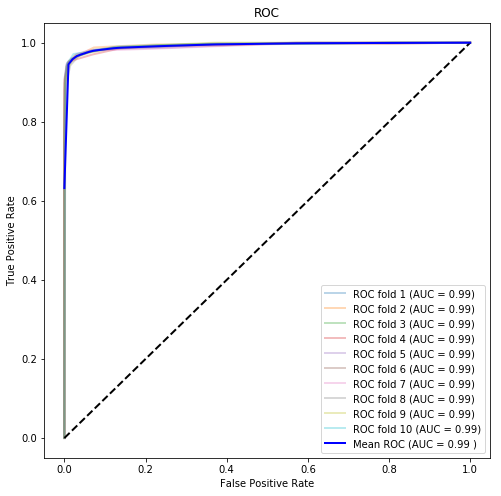

[0.95494994438264735, 0.9577308120133482, 0.95494994438264735, 0.95050055617352613, 0.95216907675194662, 0.95828698553948832, 0.95995550611790881, 0.95661846496106784, 0.95828698553948832, 0.95995550611790881]

Cross Validation Scores mean:0.9563403781979979
0.7251102924346924


In [33]:
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
from sklearn.metrics import roc_curve,auc
from scipy import interp

cvscores = []

clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train,Y_train)
cv = StratifiedKFold(n_splits=10)
# plot arrows
fig1 = plt.figure(figsize=[8,8])
#ax1 = fig1.add_subplot(111,aspect = 'equal')
#ax1.add_patch(
 #   patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
 #   )
#ax1.add_patch(
 #   patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
  #  )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
start = time.time()
for train,test in cv.split(X,Y):
    prediction = clf.fit(X_train,Y_train).predict_proba(X_test)
    y_pred=clf.predict(X_test)
    print("Accuracy:",accuracy_score(Y_test, y_pred))
    cvscores.append(accuracy_score(Y_test, y_pred))
    fpr, tpr, t = roc_curve(Y_test, prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
end = time.time()
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
#plt.text(0.32,0.7,'More accurate area',fontsize = 12)
#plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

print(cvscores)
print("\nCross Validation Scores mean:{}".format(np.mean(cvscores)))

print(end-start)

## SVM

In [34]:
clf=svm.SVC()
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",accuracy_score(Y_test, y_pred))

/home/divya/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.722469410456


## CNN

In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense
print(keras.__version__)

Using TensorFlow backend.


2.2.2


In [36]:
clf = Sequential()

In [37]:
clf.add(Dense(units = 12, init = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
clf.add(Dense(units = 8, init = 'uniform', activation = 'relu'))
clf.add(Dense(units = 1, init = 'uniform', activation = 'sigmoid'))

/home/divya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=12, activation="relu", input_dim=14, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.
/home/divya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=8, activation="relu", kernel_initializer="uniform")`
  
/home/divya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
clf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [39]:
clf.fit(X_train,Y_train, batch_size = 20, nb_epoch = 50)

/home/divya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/50
5394/5394 [==============================] - 0s 86us/step - loss: 0.6815 - acc: 0.5419
Epoch 2/50
5394/5394 [==============================] - 0s 50us/step - loss: 0.6458 - acc: 0.6263
Epoch 3/50
5394/5394 [==============================] - 0s 47us/step - loss: 0.6342 - acc: 0.6394
Epoch 4/50
5394/5394 [==============================] - 0s 47us/step - loss: 0.6303 - acc: 0.6411
Epoch 5/50
5394/5394 [==============================] - 0s 48us/step - loss: 0.6267 - acc: 0.6431
Epoch 6/50
5394/5394 [==============================] - 0s 49us/step - loss: 0.6267 - acc: 0.6463
Epoch 7/50
5394/5394 [==============================] - 0s 50us/step - loss: 0.6232 - acc: 0.6478
Epoch 8/50
5394/5394 [==============================] - 0s 46us/step - loss: 0.6227 - acc: 0.6561
Epoch 9/50
5394/5394 [==============================] - 0s 48us/step - loss: 0.6206 - acc: 0.6518
Epoch 10/50
5394/5394 [==============================] - 0s 49us/step - loss: 0.6201 - acc: 0.6544
Epoch 11/50
5394/53

In [40]:
ypred = clf.predict(X_test)
ypred = (ypred > 0.5)
accuracy = accuracy_score(Y_test,ypred)
accuracy

0.67797552836484987